In [91]:
import numpy as np
import pandas as pd
import cv2 as cv

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from keras.layers import Dense
from keras.models import Sequential, load_model

In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(784,)
(28, 28)


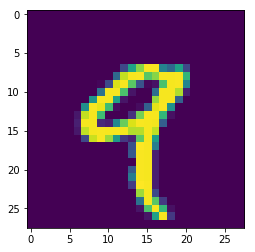

In [4]:
num = df_train.values[4][1:]

print(num.shape)
num = np.reshape(num, (28,28))
print(num.shape)

plt.imshow(num)

In [5]:
X_train = df_train.iloc[ : , 1: ].values
y_train = df_train['label'].values

X_test = df_test.iloc[ : , 1: ].values
y_test = df_test['label'].values

In [6]:
X_train = X_train / 255.0

X_test = X_test / 255.0

## One Hot Encoding

In [7]:
encoder = OneHotEncoder()

y_train = np.reshape(y_train, (60000,1))
y_train = encoder.fit_transform(y_train).toarray()

y_test = np.reshape(y_test, (10000,1))
y_test = encoder.fit_transform(y_test).toarray()

/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
y_train.shape

(60000, 10)

In [ ]:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] = 10

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0] = 0
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] = 1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] = 2
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] = 3
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] = 4
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] = 5
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] = 6
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0] = 7
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0] = 8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] = 9

## Building ANN Model

In [19]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim = (784)))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.fit(X_train,y_train, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 13s 209us/step - loss: 0.2629 - accuracy: 0.9260
Epoch 2/2
60000/60000 [==============================] - 13s 209us/step - loss: 0.1151 - accuracy: 0.9660


In [21]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 92us/step


[0.10063278794307262, 0.9670000076293945]

## Prediction

In [23]:
import cv2 as cv

In [75]:
img = cv.imread('IMG.png',0)
#img = 255-img
img = cv.resize(img , (28,28))
img = np.reshape(img, (1,784))
img = img/255.

In [76]:
pred = model.predict(img)

np.argmax(pred)

9

In [70]:
for i in pred[0]:
    print(i)

0.010170081
0.0014535473
0.026113516
0.05115396
0.0014876901
0.8603754
0.0014180667
0.0054308027
0.02081694
0.021579904


In [96]:
img = np.reshape(X_test[2], (1,784))

np.argmax(model.predict(img))

1

In [97]:
np.argmax(y_test[2])

1

In [90]:
model.save("MNIST_1Hidden_2Epochs_ANN.h5")

In [92]:
model1 = load_model('MNIST_1Hidden_2Epochs_ANN.h5')

In [93]:
model1